In [18]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시

In [14]:
# 기댓값
def E(X):
    x_set, f = X
    return np.sum([x_k * f(x_k) for x_k in x_set])

# 분산
def V(X):
    x_set, f = X
    mean = E(X)
    return np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set])  
    
    print(f'기대값 E(X): {E(X):.4}')
    print(f'분산   V(X): {V(X):.4}')

def plot_prob(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set]) 
    
    fig = plt.figure(figsize=(10,6))
    ax  = fig.add_subplot(111) # (1,1,1)
    
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', colors='red')  #기대값:평균
    ax.set_xticks(np.append(x_set, E(X)))   #x축의 값 출력
    ax.set_ylim(0, prob.max()*1.2)          #y축의 한계 지정
    ax.legend()
    for x, y in zip(x_set, prob):
        ax.text(x, y, round(y,4))
    
    plt.show()  

# 베르누이 분포

기대값 E(X): 0.25
분산   V(X): 0.1875


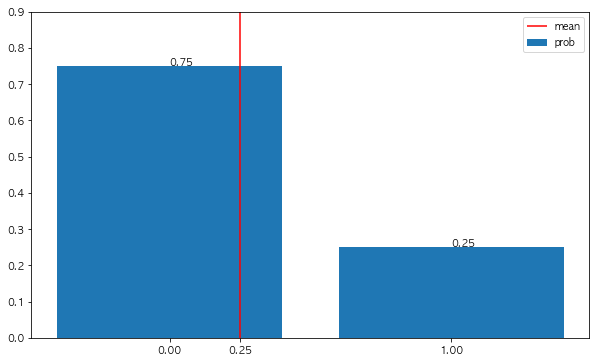

(array([0, 1]), <function __main__.Bern.<locals>.f(x)>)

In [15]:
def Bern(p):
    x_set = np.array([0,1])
    
    def f(x):
        if x in x_set:
            return p**x * (1-p)**(1-x)
        else:
            return 0

    return x_set, f

p = 0.25
x = Bern(p)
check_prob(x)
plot_prob(x)
x


<bound method rv_frozen.mean of <scipy.stats._distn_infrastructure.rv_frozen object at 0x12d5cdf40>>
<bound method rv_frozen.std of <scipy.stats._distn_infrastructure.rv_frozen object at 0x12d5cdf40>>


X의 평균: 0.25, x의 분산: 0.1875


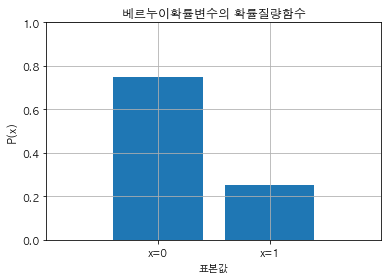

In [25]:
mu = 1/4
rv = sp.bernoulli(mu)
print(f"X의 평균: {mu}, x의 분산: {mu*(1-mu)}")

# 확률질량함수 pmf() 메서드 사용해서 그래프 그리기
xx = [0, 1]
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0,1], ['x=0','x=1'])
plt.xlabel('표본값')
plt.ylabel('P(x)')
plt.title('베르누이확률변수의 확률질량함수')
plt.grid()
plt.show()

# 이항분포

In [17]:
n = 10
p = 0.5
x = 3

from scipy.special import comb

def prob(n, p, x):    
    return comb(n,x) * p**x * (1-p)**(n-x)

a = prob(n, p, x)
b = prob(4, 1/6, 0)

print(round(b, 4))
print(round(625/1296, 4))

0.4823
0.4823


In [ ]:
p = 0.4
n = 6
x = 3

a = prob(n, p, x)
print(round(a, 4))



0.2765


In [ ]:
p = 0.25
n = 5
def Bin(n, p):
    x_set = np.arange(n+1)
    
    def f(x):
        if x in x_set:
            return comb(n,x) * p**x * (1-p)**(n-x)
        else:
            return 0
        
    return x_set, f

a = Bin(n, p)
check_prob(a)

b = sp.stats.binom(n, p)
f1 = b.cdf(round(1, 4))
f2 = b.pmf(2)
f3 = b.cdf(2)
f4 = b.pmf(round(4, 4)) + b.pmf(round(5, 4))
print(round(f1, 4))
print(round(f2, 4))
print(round(f3, 4))
print(round(f4, 4))


기대값 E(X): 1.25
분산   V(X): 0.9375
0.6328
0.2637
0.8965
0.0156


In [ ]:
p=4/5
n=10
x=7
a = prob(n,p,x)
print(f'{round(a*100, 2)}%')

p=0.05
n=20
b=sp.stats.binom(n,p)
prob_ = b.pmf(0) + b.pmf(1) + b.pmf(2)
print(round(prob_, 4))

20.13%
0.9245


0.8329


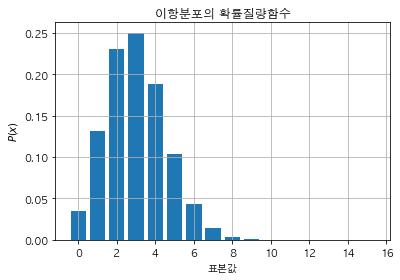

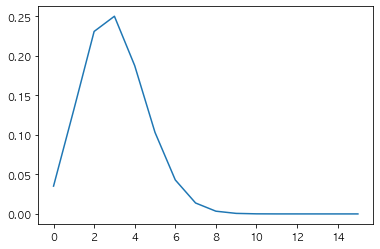

In [ ]:
p = 0.2
n = 15
a = sp.stats.binom(n,p)
prob_ = 1 - (a.pmf(0) + a.pmf(1))
print(round(prob_, 4))

xx = np.arange(n + 1)
plt.bar(xx, a.pmf(xx), align='center')
plt.xlabel("표본값")
plt.ylabel('$P(x)$')
plt.title('이항분포의 확률질량함수')
plt.grid()
plt.show()

plt.plot(xx, a.pmf(xx))

In [ ]:
n, p = 5, 0.25
rv = sp.stats.binom(n,p)
a = rv.cdf(1)
b = rv.pmf(2)
c = rv.cdf(2)
d = 1 - rv.cdf(3)

print(round(a , 4))
print(round(b , 4))
print(round(c , 4))
print(round(d , 4))


0.6328
0.2637
0.8965
0.0156


In [ ]:
n, p = 8, 0.25
rv = sp.stats.binom(n, p)

a = rv.cdf(4)
b = rv.pmf(4)
c = 1 - rv.cdf(3)

print(round(a , 4))
print(round(b , 4))
print(round(c , 4))

0.9727
0.0865
0.1138


# 기하분포

In [ ]:
def Ge(p):
    x_set = np.arange(1, 30)
    def f(x):
        if x in x_set:
            return p * (1-p) ** (x-1)
        else:
            return 0
    return x_set, f

In [ ]:
p = 0.5

rv = sp.stats.geom(p)
a = rv.pmf(5)
print(a)

p = 1/6

rv = sp.stats.geom(p)
a = rv.pmf(3)
print(a)

p = 0.05

rv = sp.stats.geom(p)
a = rv.pmf(6)
print(a)

p = 0.25

rv = sp.stats.geom(p)
a = rv.cdf(3)
print(a)

p = 0.15

rv = sp.stats.geom(p)
a = 1 - rv.cdf(2)
print(a)

0.03125
0.11574074074074076
0.038689046874999994
0.578125
0.7225


# 포아송 분포

In [ ]:
lam = 2
rv = sp.stats.poisson(lam)
a = rv.pmf(0)
print(a)

lam = 10
rv = sp.stats.poisson(lam)
a = rv.pmf(15)
print(a)

lam = 10
rv = sp.stats.poisson(lam)
a = rv.pmf(5)
print(a)

0.1353352832366127
0.034718069630684245
0.03783327480207079


# 다항 분포

In [ ]:
n = 10
p = [1/2, 1/6, 1/6, 1/6]
rv = sp.stats.multinomial(n, p)

np.random.seed(10)
X = rv.rvs(100)




plt.boxplot(X)
plt.xlabel('클래스')
plt.ylabel('표본값')
plt.title('다항분포의 시뮬레이션 결과')
plt.grid()
plt.show()

# 연속확률분포

## - 정규분포

In [ ]:
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 *np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2*sigma**2))
    return x_range, f

In [ ]:
m, std = 170, 5
rv = sp.stats.norm(m, std)

a = rv.cdf(175) - rv.cdf(165)
print(round(a, 3))

0.683


In [ ]:
m, std = 70, 8
rv = sp.stats.norm(m, std)

a = rv.cdf(86) - rv.cdf(54)
print(round(a, 3))

0.954


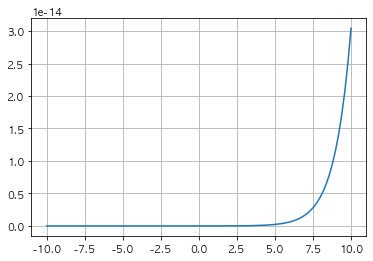

In [ ]:
# 확률밀도함수와 그래프

xx=np.linspace(-10, 10, 100)
plt.plot(xx, rv.pdf(xx))
plt.grid()
plt.show()

In [ ]:
#N(1, 4) N(-1, 9) N(2, 1) N(8, 16)
M, STD = 1, 4

rv = sp.stats.norm(M, np.sqrt(STD))
a_m = rv.mean()
a_s = rv.std()
print(f'N(1, 4)의 평균은 {a_m}, 표준편차는 {a_s} 이다.')


 



N(1, 4)의 평균은 1.0, 표준편차는 2.0 이다.


In [ ]:
rv = sp.stats.norm(0, 1)

a = rv.cdf(-1.45)
b = rv.cdf(2.58) - 0.5
c = 1 - rv.cdf(2.04)
d = rv.cdf(1.37) - 0.5
e = (rv.cdf(1.69)) * 2 - 1
f = (1-rv.cdf(2.79)) * 2 

print(round(a, 4))
print(round(b, 4))
print(round(c, 4))
print(round(d, 4))
print(round(e, 4))
print(round(f, 4))

0.0735
0.4951
0.0207
0.4147
0.909
0.0053


In [ ]:
rv = sp.stats.norm(loc=140, scale=5)

a = rv.cdf(146.3)
b = 1 - rv.cdf(133.7)

print(round(a, 4))
print(round(b, 4))

0.8962
0.8962


In [ ]:
rv = sp.stats.binom(100, 1/5)
m = rv.mean()
std = rv.std()

rv = sp.stats.norm(m, std)
a = rv.cdf(25) - rv.cdf(14)
print(round(a, 4))


0.8275


In [ ]:
rv = sp.stats.binom(100, 0.4)
m = rv.mean()
std = rv.std()

rv = sp.stats.norm(m, std)
a = rv.cdf(47)
b = 1 - rv.cdf(33)
c = rv.pdf(43)
d = rv.cdf(45) - rv.cdf(35)

print(round(a, 4))
print(round(b, 4))
print(round(c, 4))
print(round(d, 4))




0.9235
0.9235
0.0675
0.6926


## - 지수분포

In [ ]:
lam = 2
rv = sp.stats.expon(scale = 1/lam)
rv.cdf(3)

lam = 10
rv = sp.stats.expon(scale = 1/lam)
rv.cdf(1/60)

0.15351827510938593

## - t분포